In [1]:
!pip install ta


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for bokeh>=1.4.0 from https://files.pythonhosted.org/packages/1a/02/b312d65b83d0ec17d73e1594118e1163a4d79546925424374922fab2ea09/bokeh-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.2 from https://files.pythonhosted.org/packages/d8/d5/f23beca650c8aab67e72f610d65817c68c306e6f6a124ca337fcec7d5d57/contourpy-1.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for xyzservices>=2021.09.1 from https://files.pythonhosted.org/packages/b7/2c/08768a39947864fcebc19f059b758d8169a2ac183a61361359f56c144f7c/xyzservices-2024.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 k

In [4]:
!pip install backtrader

  Obtaining dependency information for backtrader from https://files.pythonhosted.org/packages/f3/ef/328c6ec332435f63b3e18febd263686b8ba07e990676a862cc8522ba38f5/backtrader-1.9.78.123-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 1.6 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import ta
import yfinance as yf
import ssl

In [13]:

# Ignore SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

data = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50#Constituents")[2]
tickers = data.Symbol.to_list()

tickers = [i + ".NS" for i in tickers]

tickers

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LTIM.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [14]:
def RSI(asset):
    df = yf.download(asset, start = '2021-01-01', end = '2024-01-01')
    df['MA200'] = df["Adj Close"].rolling(window = 200).mean()
    df['Upmove'] = (df['Close'] - df['Open']).apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = (df['Close'] - df['Open']).apply(lambda x: abs(x) if x < 0 else 0)
    df['avg_up'] = df['Upmove'].ewm(span=14, min_periods=14).mean()
    df['avg_down'] = df['Downmove'].ewm(span=14, min_periods=14).mean()
    df.dropna(inplace=True)
    df['RS'] = df['avg_up'] / df['avg_down']
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    df.loc[(df['Adj Close']>df['MA200']) & (df['RSI'] < 30), 'BUY'] = "YES"
    df.loc[(df['Adj Close']<df['MA200'] )| (df['RSI'] > 30), 'BUY'] = "NO"
    return df
    

In [15]:
def getSignalRSI(df):
    Buy_dates = []
    Sell_dates = []
    for i in range(len(df) - 21):
        if "YES" in df['BUY'].iloc[i]:
            Buy_dates.append(df.iloc[i+1].name)
            for j in range(1,21):
                if df['RSI'].iloc[i+j] > 70:
                    Sell_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 20:
                    Sell_dates.append(df.iloc[i+j+1].name)

    return Buy_dates,Sell_dates
        

In [16]:
d = RSI(tickers[3])
Buy,Sell = getSignalRSI(d)

[*********************100%%**********************]  1 of 1 completed
/var/folders/28/x8q2f_yx2g7881jgwz63bk5r0000gn/T/ipykernel_9109/4216682941.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'YES' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Adj Close']>df['MA200']) & (df['RSI'] < 30), 'BUY'] = "YES"


In [17]:
import matplotlib.pyplot as plt

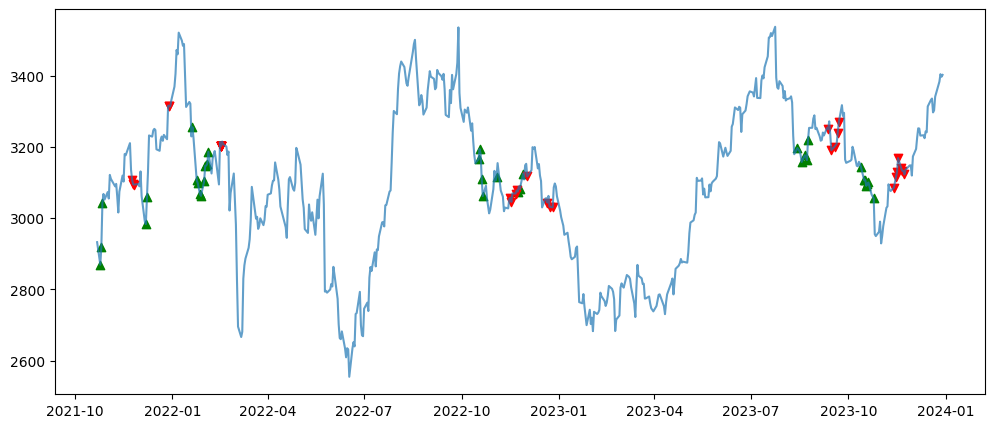

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(d.loc[Buy].index,d.loc[Buy]['Adj Close'], marker = '^', color = 'g')
plt.scatter(d.loc[Sell].index,d.loc[Sell]['Adj Close'], marker = 'v', color = 'r')
plt.plot(d['Adj Close'], alpha = 0.7)

In [23]:
profits = (d.loc[Sell].Open.values - d.loc[Buy].Open.values)/d.loc[Buy].Open.values

Net_prof = (1+profits).cumprod()
Net_prof

array([1.08001697, 1.1682711 , 1.19596222, 1.32665254, 1.47555585,
       1.47465667, 1.48007157, 1.56601121, 1.63578122, 1.71417329,
       1.7906014 , 1.83881421, 1.88196159, 1.92129537, 1.97674053,
       1.91083887, 1.83602044, 1.78262773, 1.76218996, 1.80086728,
       1.78581663, 1.76497928, 1.73644455, 1.7771388 , 1.81077961,
       1.83375896, 1.84757259, 1.87654783, 1.8455699 , 1.82294333,
       1.81248334, 1.83579502, 1.88407253, 1.92330748, 1.95725485])

In [24]:
def MACD(asset):
    df = yf.download(asset, start = '2023-11-01', end = '2024-01-01', interval = '1h')
    df['EMA12'] = df['Adj Close'].ewm(span = 12).mean()
    df['EMA26'] = df['Adj Close'].ewm(span = 26).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span = 9).mean()
    return df

In [28]:
MACD_Frame = MACD(tickers[5])
MACD_Frame

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal
Datetime,,,,,,,,,,
2023-11-01 09:15:00+05:30,5413.649902,5438.350098,5348.600098,5374.899902,5374.899902,0,5374.899902,5374.899902,0.000000,0.000000
2023-11-01 10:15:00+05:30,5375.000000,5385.200195,5361.350098,5370.000000,5370.000000,48197,5372.245789,5372.355722,-0.109934,-0.061074
2023-11-01 11:15:00+05:30,5376.299805,5399.950195,5370.000000,5382.899902,5382.899902,128322,5376.404092,5376.144144,0.259948,0.070492
2023-11-01 12:15:00+05:30,5382.850098,5385.000000,5362.100098,5367.899902,5367.899902,63117,5373.719651,5373.839414,-0.119763,0.006043
2023-11-01 13:15:00+05:30,5367.850098,5375.000000,5363.850098,5372.000000,5372.000000,44133,5373.252428,5373.412846,-0.160418,-0.043476
...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:15:00+05:30,6710.350098,6734.000000,6701.000000,6720.100098,6720.100098,28740,6677.580177,6604.317301,73.262876,77.220210
2023-12-29 12:15:00+05:30,6722.750000,6760.000000,6718.149902,6750.350098,6750.350098,46708,6688.775549,6615.134546,73.641004,76.504368
2023-12-29 13:15:00+05:30,6752.500000,6757.899902,6732.000000,6740.549805,6740.549805,29652,6696.740820,6624.424565,72.316255,75.666746


In [29]:
Buy,Sell = [],[]
for i in range (2,len(MACD_Frame)):
    if MACD_Frame.MACD.iloc[i] > MACD_Frame.Signal.iloc[i] and MACD_Frame.MACD.iloc[i - 1] < MACD_Frame.Signal.iloc[i - 1]:
        Buy.append(i+1)
    elif MACD_Frame.MACD.iloc[i] < MACD_Frame.Signal.iloc[i] and MACD_Frame.MACD.iloc[i - 1] > MACD_Frame.Signal.iloc[i - 1]:
        Sell.append(i+1)
    

In [30]:
Buy = [i for i in Buy if i < len(MACD_Frame)]
Sell = [i for i in Sell if i < len(MACD_Frame)]

Buy_Price = MACD_Frame.Open.iloc[Buy]
Sell_Price = MACD_Frame.Open.iloc[Sell]


In [31]:
if Buy_Price.index[0] > Sell_Price.index[0]:
    Sell_Price = Sell_Price.drop(Sell_Price.index[-1])
elif Buy_Price.index[-1] > Sell_Price.index[-1]:
    Buy_Price  = Buy_Price.drop(Buy_Price.index[-1])

In [32]:
Profits = []

for i in range(len(Buy_Price)):
    Profits.append((Sell_Price.iloc[i] - Buy_Price.iloc[i])/Buy_Price.iloc[i])

In [33]:
Profits = np.array(Profits)

In [34]:
Net_Profits = (1 + Profits).cumprod()
Net_Profits

array([0.99721337, 1.01277692, 1.00818181, 1.04816636, 1.08154284,
       1.07661752, 1.07164304, 1.06693036, 1.0589654 , 1.09253457,
       1.08880911, 1.1433392 ])